In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from collections import defaultdict
from sklearn import preprocessing
from pandas.plotting import scatter_matrix
import math
from collections import Counter
import random
from statistics import mean
import pandas
from decimal import Decimal 


plt.rcParams['figure.figsize'] = (20,6)


In [11]:
def read_file(fin):
    labeled_data = []
    with open(fin, 'r') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        for row in csv_reader:
            if '?' in row:
                continue
            if row[0] == 'no-recurrence-events':
                labeled_data.append(row[1:] + [False])
            else:
                labeled_data.append(row[1:] + [True])
    return labeled_data
                
            
data = read_file('breast-cancer.data.txt')


    


In [12]:
def train_test_split(data, test_size=0.3):
    train = []
    test = []
    data = random.sample(data, len(data))
      

    test_length = int(len(data)*test_size)
    for i in range(len(data)):
        if i <= (len(data) - test_length):
            train.append(data[i])
        else:
            test.append(data[i])
    return train, test
        
train_data, test_data = train_test_split(data)
test_length = len(test_data)
    
    

In [13]:
def tran_form_dict(labeled_data):
    """Change the features of each instance into numbers and then place each instance into a dictionary with their
    key being their label """
    feat_into_dict = {}
    for feature_num in range(len(labeled_data[0])):
        feature_values = [instance[feature_num] for instance in labeled_data]
        x = 0
        for i, item in enumerate(feature_values):
            if item in feat_into_dict:
                feature_values[i] = feat_into_dict[item]
            else:
                feat_into_dict[item] = x
                feature_values[i] = feat_into_dict[item]
                x += 1
      
    for instance in labeled_data:
        for i, attribute in enumerate(instance):
             instance[i] = feat_into_dict[attribute]
                
    #place each instance into dictionary
    input_dict = defaultdict(list)
    for instance in labeled_data:
        if instance[-1] == 0:
            input_dict[False].append(instance)
        else:
            input_dict[True].append(instance)
    
    
    return input_dict
                


train_data = tran_form_dict(train_data)
test_data = tran_form_dict(test_data)

    
    

In [14]:
def euclidean_distance(x, y):
    return np.sqrt(np.sum((np.array(x) - np.array(y))**2))



In [15]:
def p_root(value, root):
    root_value = 1 / float(root)
    return round (Decimal(value) **
             Decimal(root_value), 3) 
    
    
def Minkowsky_distance(x, y, p_value):
    return (p_root(sum(pow(abs(a-b), p_value) 
            for a, b in zip(x, y)), p_value)) 
    
    
    

In [31]:
def chi_squared_distance(x, y):
    distance = []
    for i in range(len(x)):
        try:
            distance.append(pow((x[i]-y[i]), 2) / (x[i] + y[i]))
        except ZeroDivisionError:
            pass
    return sum(distance)
        


def manhattan_distance (x, y):
    return sum(abs(x[i] - y[i])
              for i in range(len(x)))
    

In [25]:
def k_nearest_neighbors(data, predict, k=1, distance_func=euclidean_distance, p_value=2):
    
    if len(data[0]) <= k:
        print('Error: the k value is too big!')
    distances = []
    for group in data:
        for instance in data[group]:
            if distance_func != Minkowsky_distance:
                distance = distance_func(instance, predict)
            else:
                distance = distance_func(instance, predict, p_value)
            distances.append([distance,group])

    votes = [i[1] for i in sorted(distances)[:k]]
    
    vote_result = Counter(votes).most_common(1)[0][0]
    
    return vote_result
            
# result = k_nearest_neighbors(new_data, [2, 1, 1, 0, 0, 0, 1, 0, 0, 1])
# if result:
#     print('You have breast cancer')
# else:
#     print("Don't worry...you don't have breast cancer")

In [52]:
def test_accuracy(test_data, distance_func, k=1, p_value=2):
    y_test = []

    #fill up the actual y values
    for group in test_data:
        for instance in test_data[group]:
            y_test.append(instance[-1])

    #fill up the y prediction list
    y_pred = []
    for group in test_data:
        for instance in test_data[group]:
            y_pred.append(k_nearest_neighbors(train_data, instance, k, distance_func, p_value))

    #test the accuracy
    truth_values = 0
    for i in range(test_length):
        if y_test[i] == y_pred[i]:
            truth_values += 1

    accuracy = truth_values/test_length
    return accuracy


euclidean_distances = []
Minkowsky_distances = []
chi_squared_distances = []
manhattan_distances = []
for k in range(1, 5):
    distance_metrics = [euclidean_distance, Minkowsky_distance, chi_squared_distance, manhattan_distance]
    accuracies = [test_accuracy(test_data, func, k) if func != Minkowsky_distance 
                  else test_accuracy(test_data, func, k, 2) for func in distance_metrics]
    euclidean_distances.append(accuracies[0])
    Minkowsky_distances.append(accuracies[1])
    chi_squared_distances.append(accuracies[2])
    manhattan_distances.append(accuracies[3])

total = [euclidean_distances, Minkowsky_distances, chi_squared_distances, manhattan_distances]      

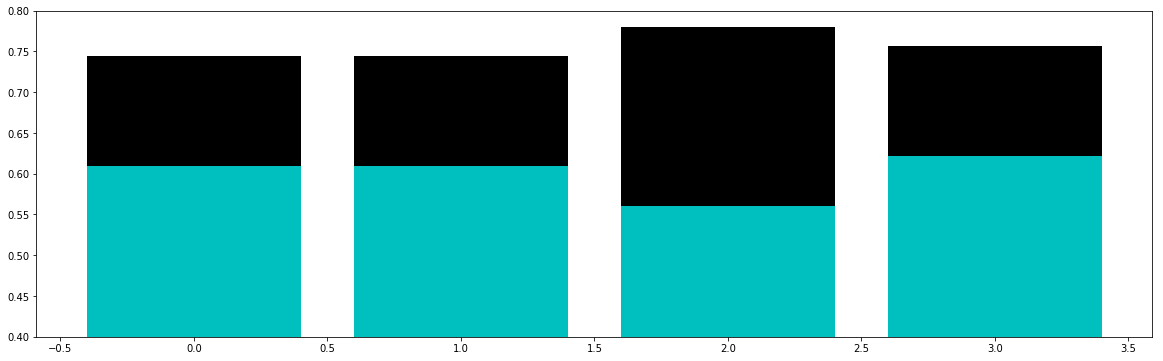

In [46]:
fig, ax = plt.subplots()
ax.bar(x, euclidean_distances, color='b')
ax.bar(x, Minkowsky_distances, color='g')
ax.bar(x, chi_squared_distances, color='k')
ax.bar(x, manhattan_distances, color='c')
ax.set(ylim=[0.4, 0.8])
plt.show()

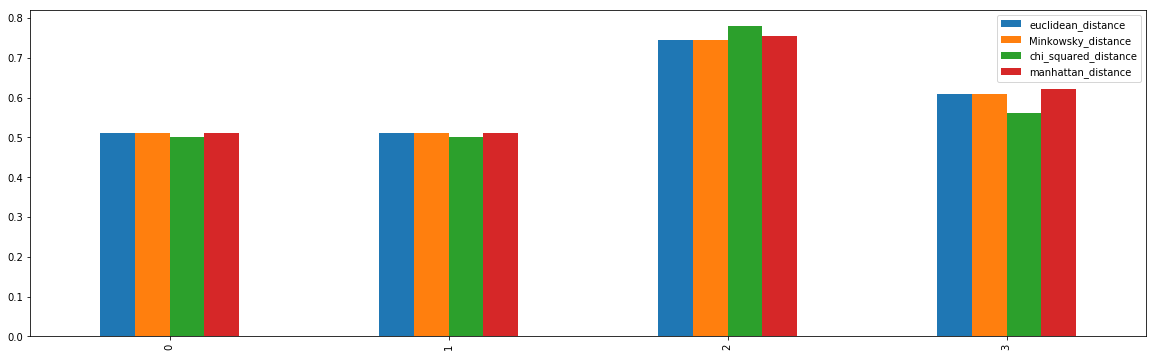

In [53]:
df = pd.DataFrame(total, columns=['euclidean_distance', 'Minkowsky_distance', 'chi_squared_distance', 'manhattan_distance'])
df.plot.bar()


